<img src="logo_ESPRIT.jpg" width="300" align="right"></a>
<img src="breast.jpg" width="130" align="left"></a>

<h1 align="center"><font size="7">Projet Machine Learning 4CINFOGL1</font></h1>

Ce Porjet doit être rédigé et sera évalué. Le code python produit doit être inclus. Pour la mise en page et le format, il est préférable de le rendre sous la forme d’un notebook Jupyter, ou alors d’un document pdf. Les noms doivent apparaître dans le document. Il doit être envoyé le 30 Janvier 2021 au plus tard à l’adresse suivante.
lotfi.ncib@esprit.tn 

# Objectif du projet
L'objectif de ce projet est de:
- Tester cinq algorithmes de classification (K_nearst neighbors, Arbre de décision, Régression Logistique, Gaussian Naive Bayes et Support vector machine) pour la résolution d'un problème de classification binaire(deux classes)
- Régler le maximum de paramètres pour chaque algorithme
- Tracer la matrice de confusion et afficher __classification_report__ de chaque algorithme
- Choisir le meilleur algorithme en utilisant __classification_report__

# Base de données __breast_cancer__

Pour ce projet on considère un jeu de données médicales. Chaque exemple correspond à une tumeur du sein. Les variables explicatives portent sur des caractéristiques observées de la tumeur. La variable à prédire indique s’il s’agit d’une tumeur maligne (4) ou bénigne (2). 

In [1]:
# Chargement des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importer l'ensemble de données avec read_csv:  Variables __breast_cancer

In [2]:
database_variables = pd.read_csv('Variables_breast_cancer.csv')

#### Question 1: Créer une variable `data` à qui vous affectez la base de données `breast_cancer.csv`

In [3]:
data = pd.read_csv('breast_cancer.csv')

#### Question 2: Quelle est la dimension de `data`?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              569 non-null    int64
 1   uniformity_of_cell_size      569 non-null    int64
 2   uniformity_of_cell_shape     569 non-null    int64
 3   marginal_adhesion            569 non-null    int64
 4   single_epithelial_cell_size  569 non-null    int64
 5   bare_nuclei                  569 non-null    int64
 6   bland_chromatin              569 non-null    int64
 7   normal_nucleoli              569 non-null    int64
 8   mitosis                      569 non-null    int64
 9   class                        569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


#### Question 3:  En utilisant la méthode `head` (resp la méthode `tail` ) afiicher les trois premières lignes de `data`(resp les trois dérnières lignes de `data`)

In [5]:
data.head(3)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2


In [6]:
data.tail(3)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
566,3,1,2,1,2,1,3,1,1,2
567,4,1,1,1,2,3,2,1,1,2
568,8,4,4,1,6,10,2,5,2,4


#### Question 4: Dans un seul fichier afficher les statistiques nécessaires pour `data` 

In [7]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['clump_thickness'].value_counts())
print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, diagnosis_categories[0],  diagnosis_categories[1]))


 	 The data has 569 diagnosis, 117 malignant and 97 benign.


#### Question 5:Extraire de `data` : les observations dans une variable`X` et les classes dans une variable `y`


In [8]:
features_mean= list(data.columns[1:11])

In [9]:
features_mean

['uniformity_of_cell_size',
 'uniformity_of_cell_shape',
 'marginal_adhesion',
 'single_epithelial_cell_size',
 'bare_nuclei',
 'bland_chromatin',
 'normal_nucleoli',
 'mitosis',
 'class']

In [10]:
X = data.loc[:,features_mean]
Y = data.loc[:, 'class']


#### Question 2: Quelle est la dimension de `data`?

#### Question 6: Diviser l'ensemble des observations X et l'ensemble de classes y, chacun en deux sous-ensembles :
- un sous-ensemble d'apprentissage : 80% de l'ensemble initial
- un sous-ensemble de test : 20% de l'ensemble initial
##### __Indication__ : Fixer à 0 le générateur aléatoire

In [11]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=3)


<h1 align="center"><font size="7">K Nearest Neighbor(KNN)</font></h1>

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#### En utilisant la méthode GridSearchCV, identifier le meilleur nombre de voisin (tester les valeurs de $n_{neighbors}\in \{1,2,3...25\}$, ainsi que la meilleur distance à utiliser (tester les valeurs de $p\in \{1,2,3,4,5,6 \}$

0.9666353383458647
{'n_neighbors': 6, 'weights': 'distance'}


#### Afficher les meilleures valeurs des hyperparamètres réglés

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
##x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [107]:
val_score=[]
k=np.arange(1,25)
for k in k:
    scores=cross_val_score(KNeighborsClassifier(k),x_train,y_train,cv=6)
    val_score.append(scores.mean())
print(val_score)

[0.9451169590643276, 0.9407309941520469, 0.9670760233918129, 0.94953216374269, 0.9648830409356725, 0.9583040935672514, 0.9604970760233917, 0.9539181286549706, 0.9583040935672514, 0.9517251461988304, 0.9539181286549708, 0.94953216374269, 0.94953216374269, 0.9517251461988304, 0.9517251461988304, 0.9473391812865497, 0.9473391812865497, 0.9473391812865497, 0.9473391812865497, 0.9451461988304093, 0.9473391812865497, 0.942953216374269, 0.942953216374269, 0.9407602339181286]


#### Créer une instance __`final_model_knn`__ de l'algorithme de classification par KNN en utilisant les meilleurs hyperparamètres trouvés dans la question précédente
#### Entrainer __`final_model_knn`__ sur le sous-ensemble de données approprié.

In [112]:
from sklearn.model_selection import validation_curve
final_model_knn=KNeighborsClassifier(n_neighbors=val_score)

#### Tracer la matrice de confusion de __`final_model_knn`__

In [119]:
from sklearn.metrics import confusion_matrix
y_actu = Y_train
y_pred = grid.predict(X_test)
confusion_matrix(Y_test,y_pred)

array([[77,  0],
       [ 0, 37]], dtype=int64)

### Afficher le __`classification_report`__ de __`final_model_knn`__

In [121]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        37

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



# Pour les autres algoritmes vous allez suivre pratiquement le meme raisonnement.

<h1 align="center"><font size="7">Decision tree - SALIM MEJDOUB</font></h1>

#### Importer le modèle __`DecisionTreeClassifier`__ à partir du module __`tree`__ du module __`sklearn`__.

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

#### Créer un dictionaire __`param_grid`__, en vue de configurer les trois hyperparamètres suivants :
##### - __`criterion`__ : qui peut être soit l'indice de Gini soit l'entropie
##### - __`max_depth`__ : qui varie de 1 à 19
##### - __`splitter`__ : qui peut être soit best ou random

In [29]:
param_grid = {
    "criterion"  : ["gini", "entropy"],
    'max_depth' : np.arange(1,19),
    'splitter' : ["best", "random"]
}

#### Créer une instance de recherche par grille appliquée sur l'algorithme de classification par arbre de décision. La recherche doit tester toutes les combinaisons des valeurs des hyperparamètres de la grille de la question précédente. La recherche doit se faire à travers une validation croisée à 5 découpes.

In [30]:
from sklearn.model_selection import GridSearchCV

In [40]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=0,min_impurity_decrease=0.6,class_weight="balanced"), param_grid=param_grid, cv=5)

In [41]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              min_impurity_decrease=0.6,
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18]),
                         'splitter': ['best', 'random']})

#### Afficher les meilleures valeurs des hyperparamètres réglés

In [42]:
grid.best_params_


{'criterion': 'entropy', 'max_depth': 1, 'splitter': 'best'}

#### Créer une instance __`final_model_dt`__ de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres trouvés dans la question précédente

In [43]:
final_model_dt = DecisionTreeClassifier(criterion="entropy" ,random_state=0, max_depth=3)

In [36]:
final_model_dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [37]:
print("train_score" , final_model_dt.score(X_train,Y_train) )
print("test_score" , final_model_dt.score(X_test,Y_test) )

train_score 1.0
test_score 1.0


#### Afficher l'arbre de décision

In [38]:
features = ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin','normal_nucleoli', 'mitosis']


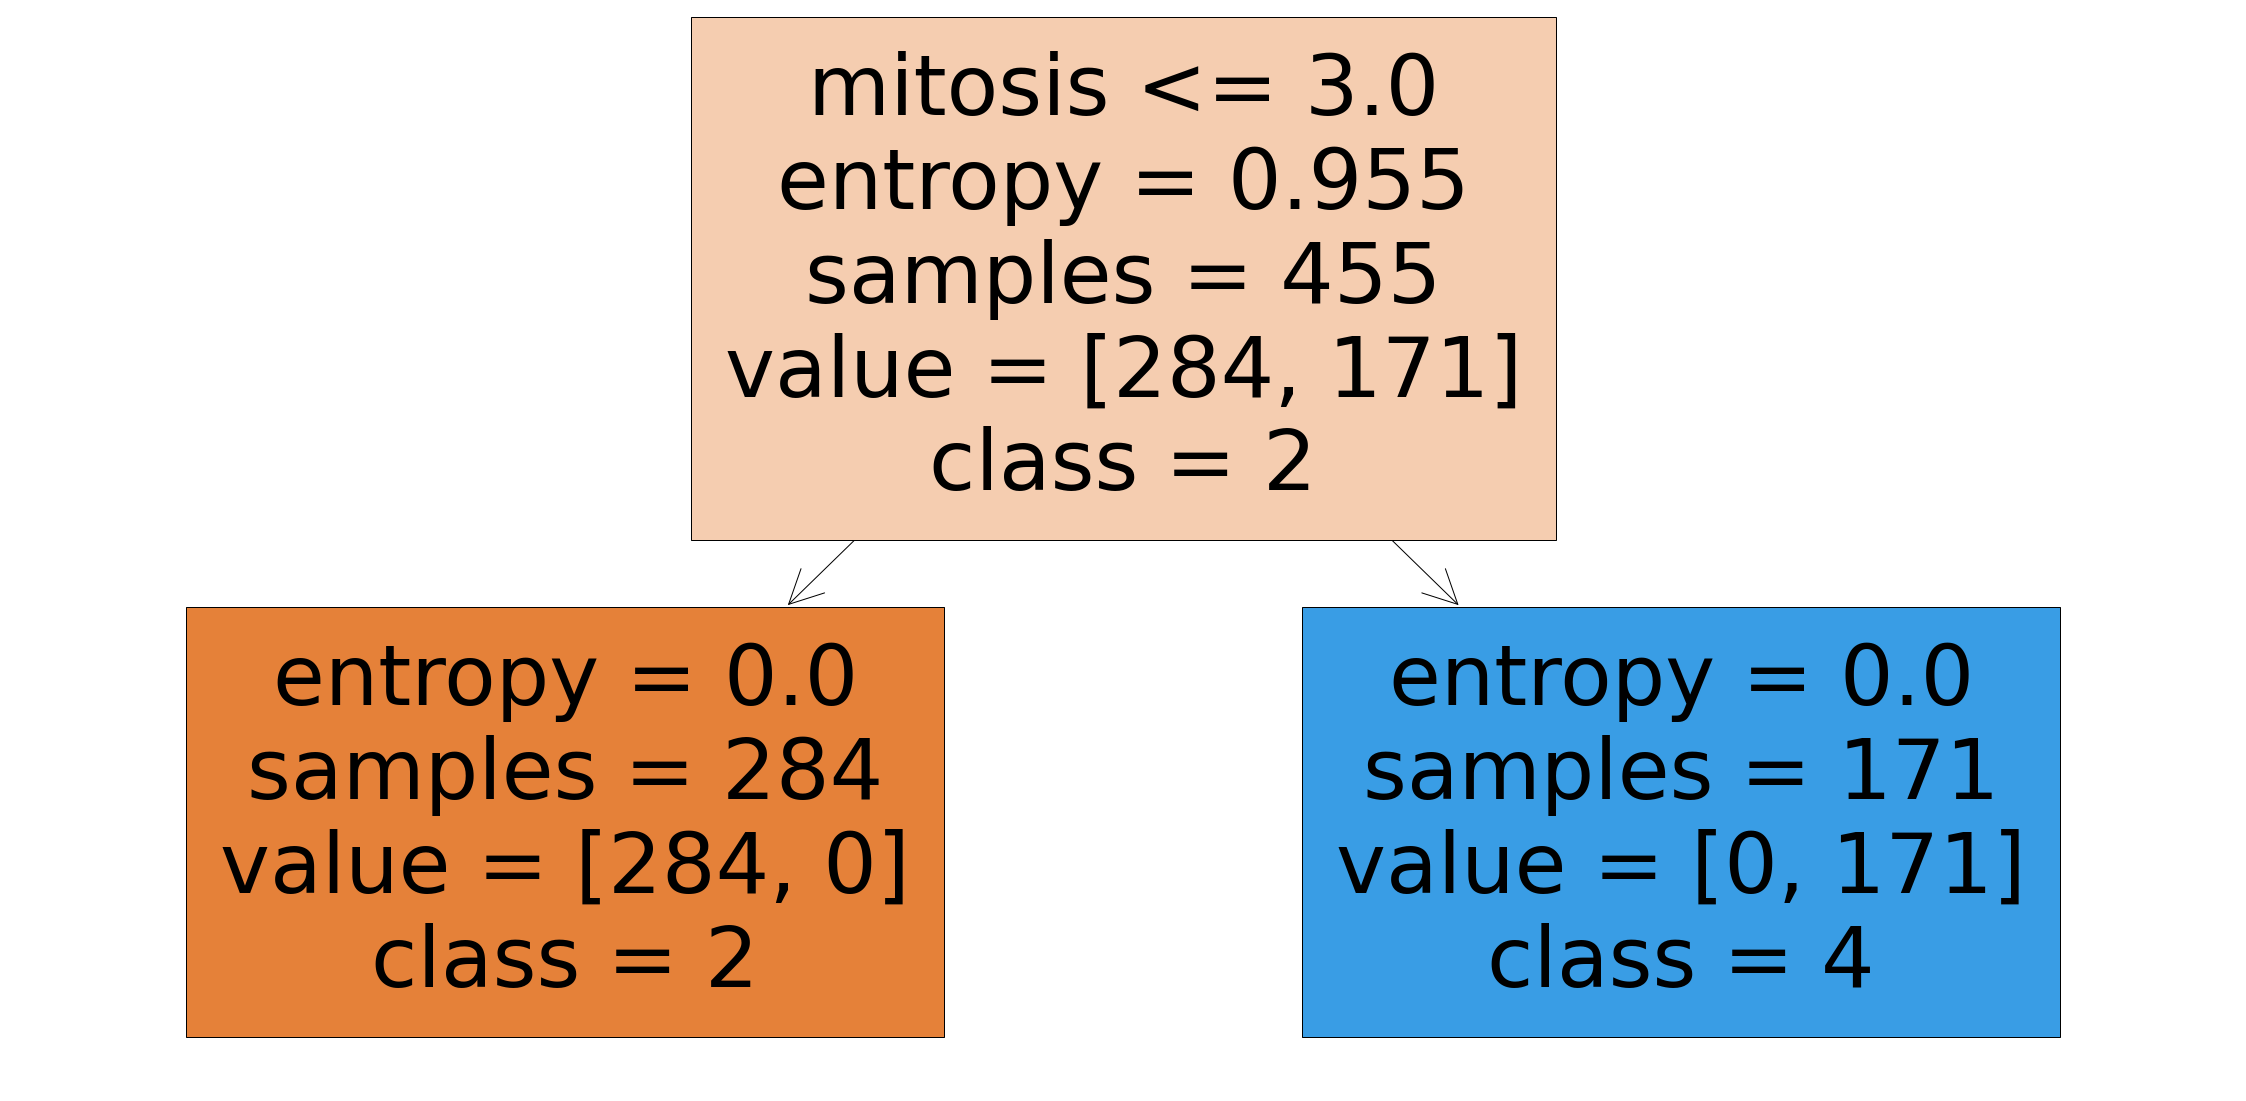

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 20))
plot_tree(final_model_dt, feature_names=features,class_names=["2","4"], filled=True)
plt.show()

#### Afficher l'arbre sous forme de régles de décision

In [43]:
from sklearn.tree import export_text
print(export_text(final_model_dt,feature_names=features,show_weights=True ))

|--- mitosis <= 3.00
|   |--- weights: [284.00, 0.00] class: 2
|--- mitosis >  3.00
|   |--- weights: [0.00, 171.00] class: 4



#### Tracer la matrice de confusion de __`final_model_dt`__

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [56]:
print("matrice de confusion")
confusion_matrix(Y_test,grid.predict(X_test))

matrice de confusion


array([[77,  0],
       [ 0, 37]])

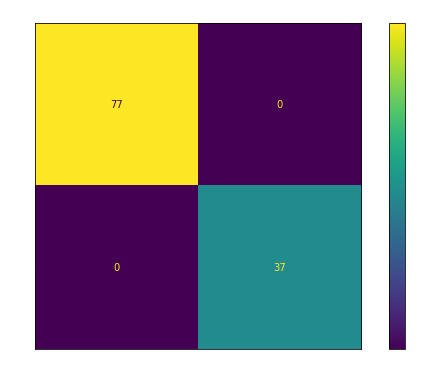

In [67]:
matrix = plot_confusion_matrix(grid, X_test,Y_test)
matrix.ax_.set_title("Confusion Matrix", color="White")
plt.xlabel("Predected Label", color="White")
plt.ylabel("True label", color="white")
plt.gcf().axes[0].tick_params(colors="white")
plt.gcf().axes[1].tick_params(colors="white")
plt.gcf().set_size_inches(10,6) 

### Afficher le __`classification_report`__ de __`final_model_dt`__

In [70]:
from sklearn.metrics import classification_report

In [76]:
print("classification_report")
print(classification_report(Y_test, grid.predict(X_test), target_names=["class_2","class_4"]))

classification_report
              precision    recall  f1-score   support

     class_2       1.00      1.00      1.00        77
     class_4       1.00      1.00      1.00        37

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



<h1 align="center"><font size="7">LogisticRegression</font></h1> 

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [425]:
# Chargement de LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [428]:
#Construction du model
#solver=&#39;liblinear&#39; est un bon choix pour les petits DATAset
model = LogisticRegression(max_iter = 900,solver = 'liblinear')

In [429]:
#entrainer mon model avec X_train et Y_train
model.fit(X_train, Y_train)

LogisticRegression(max_iter=900, solver='liblinear')

In [430]:
#y_pred c&#39;est le resultat de préduction sur X_test
y_pred=model.predict(X_test)

In [432]:
print("Ensuite on va pouvoir l'évaluer sur les memes données (X_train,Y_train) et on obtient un scrore de")
model.score(X_train,Y_train)

Ensuite on va pouvoir l'évaluer sur les memes données (X_train,Y_train) et on obtient un scrore de


0.9956043956043956

#### Tracer la matrice de confusion de __`....`__

In [433]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[77  0]
 [ 0 37]]


### Afficher le __`classification_report`__ de __`....`__

In [436]:
from sklearn.metrics import classification_report
print("...classification_report...")
print(classification_report(Y_test,y_pred))

...classification_report...
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        37

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



<h1 align="center"><font size="7">GaussianNB (Gaussian Naive Bayes)- Aymen Chabbouh</font></h1>

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [25]:
# Chargement de GaussianNB
from sklearn.naive_bayes import GaussianNB

#### Créer une instance __`model`__ de l'algorithme de classification par GaussianNB.
#### Entrainer __`model`__ sur le sous-ensemble de données approprié.

In [301]:
gnb_param_grid = {
    "var_smoothing"  : [1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08,1e-09,1e-10]
   
}


In [302]:
grid_gnb = GridSearchCV(gaussian_nb, param_grid=gnb_param_grid, cv=10)
grid_gnb.fit(X_train,Y_train)


GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.1, 0.01, 0.001, 0.0001, 1e-05,
                                           1e-06, 1e-07, 1e-08, 1e-09, 1e-10]})

In [303]:
best_param_dict = grid_gnb.best_params_
best_param_dict

{'var_smoothing': 1e-10}

In [304]:
gaussian_nb_final_model = GaussianNB(var_smoothing=best_param_dict['var_smoothing'])
gaussian_nb_final_model.fit(X_train,Y_train)

gaussian_nb_default_model = GaussianNB()
gaussian_nb_default_model.fit(X_train,Y_train)
print("default model train_score" , gaussian_nb_default_model.score(X_train,Y_train) )
print("default model test_score" , gaussian_nb_default_model.score(X_test,Y_test) )
print("final model train_score" , gaussian_nb_final_model.score(X_train,Y_train) )
print("final model test_score" , gaussian_nb_final_model.score(X_test,Y_test) )

default model train_score 0.9692307692307692
default model test_score 0.9649122807017544
final model train_score 1.0
final model test_score 1.0


In [305]:
gnb_default_y_pred = gaussian_nb_default_model.predict(X_test)
gnb_final_y_pred = gaussian_nb_final_model.predict(X_test)

#### Tracer la matrice de confusion de __`model`__

In [306]:
print("final model matrix",confusion_matrix(Y_test,gnb_y_pred))

final model matrix [[77  0]
 [ 0 37]]


default  model matrix


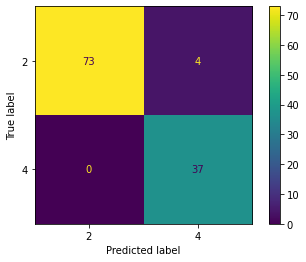

In [317]:
import matplotlib.pyplot as plt
print("default  model matrix")
plot_confusion_matrix(gaussian_nb_default_model, X_test,Y_test)


final model matrix


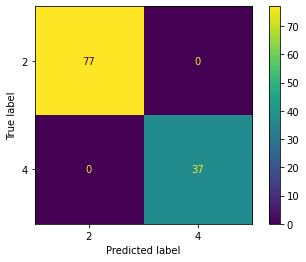

In [318]:
print("final model matrix")
plot_confusion_matrix(grid_gnb, X_test, Y_test)


### Afficher le __`classification_report`__ de __`model`__

In [321]:
print("default model \n",classification_report(Y_test,gnb_default_y_pred))


default model 
               precision    recall  f1-score   support

           2       1.00      0.95      0.97        77
           4       0.90      1.00      0.95        37

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [322]:
print("final model \n",classification_report(Y_test,gnb_final_y_pred))


final model 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        37

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



<h1 align="center"><font size="7"> Support vector machine (SVM)</font></h1>

# Vous allez suivre pratiquement le même raisonnement. vous allez répondre aux même questions déjà posées

In [8]:
from sklearn.svm import SVC

In [75]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [57]:
y_pred = svclassifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[73  4]
 [ 0 37]]


In [60]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           2       1.00      0.95      0.97        77
           4       0.90      1.00      0.95        37

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



<h1 align="center"><font size="7">Random Forest Classifierst - Mohamed BESBES</font></h1>

In [409]:
from sklearn.ensemble import RandomForestClassifier

In [424]:
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt
st=dt.now()
randomforest = RandomForestClassifier(random_state = 0)
forest_param_grid = {
    'n_estimators'  : range(1,10)
   
}

grid_forest = GridSearchCV(randomforest, param_grid=forest_param_grid, cv=10)
grid_forest.fit(X_train,Y_train)

best_param_forest = grid_forest.best_params_
randomforest_final_model = RandomForestClassifier(best_param_forest['n_estimators'], 
                                      random_state = 0)
randomforest_final_model.fit(X_train, Y_train)
print("Time taken to complete random search: ",dt.now()-st)

random_pred_final = randomforest_final_model.predict(X_test)

#Model Evaluation

print('Train Score: ' , randomforest_final_model.score(X_train, Y_train))

print('Test Score: ' , randomforest_final_model.score(X_test, Y_test))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,random_pred_final))
print(classification_report(Y_test,random_pred_final))

Time taken to complete random search:  0:00:01.134998
Train Score:  1.0
Test Score:  1.0
[[77  0]
 [ 0 37]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        37

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



# Etude compartive

| Algorithm          | weighted_avg_recall      | weighted_avg_precsion | weighted_avg_F1-score|
|--------------------|----------------------    |-----------------------|----------------------|
| KNN                | 1                        | 1                     | 1                    |
| Decision Tree      | 1                        | 1                     | 1                    |
| GaussianNB         | 0.96(1 using gridSCV)    | 0.97(1 using gridSCV) | 0.97(1 using gridSCV)|
| LogisticRegression | 1                        | 1                     | 1                    |
| SVM                | 0.96                     | 0.97                  | 0.97                 |
| Random Forest      | 1                        | 1                     | 1                    |

# Conclusion